In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt


# Pulse-coupled oscillators

Each cell has a charge $y(t)$. The charge is updated according to:
$$
\dot{y} = I - \alpha y
$$
$I$ is the charging rate and $\alpha$ a leaking rate. Charging is balanced by leakage and the charge reaches a steady state when $y = I/\alpha = y^{\star}$.

When the charges reaches $y = 1$, the cell fires and sends a pulse to all other cells. The pulse is received by other cells with a strength $p$.

See more [there](https://www.complexity-explorables.org/explorables/dr-fibryll-and-mr-glyde/).


# Cycle for one oscillator

Period of firing will be: T = 2.40


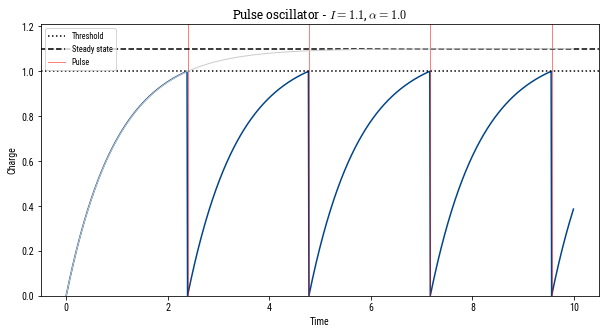

In [3]:
# Oscillator parameters
I = 1.1
alpha = 1
print('Period of firing will be: T = {:.2f}'.format(1/alpha * np.log(I/(I-alpha))))

T = 10
dt = 0.01
t = np.arange(0, T, dt)

# Solve
# --> Initial state
y = np.zeros(len(t))
pulse_times = []
# --> Update
for ii in range(1, len(t)):
    y[ii] = y[ii-1] + dt * (I - y[ii-1] * alpha)
    if y[ii] > 1:
        pulse_times.append(t[ii])
        y[ii] = 0

# Show
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title(r'Pulse oscillator - $I = {:.1f}$, $\alpha = {:.1f}$'.format(I, alpha), fontname='Roboto Slab')
ax.set_xlabel('Time')
ax.set_ylabel('Charge')

ax.plot(t, y)
for tt in pulse_times:
    ax.axvline(tt, color='red', alpha=0.5, lw=1)

ax.axhline(1, color='black', linestyle=':', label='Threshold')
ax.axhline(I/alpha, color='black', linestyle='--', label='Steady state')

ax.plot([], [], color='red', alpha=0.5, lw=1, label='Pulse')
plt.legend()

ax.plot(t, I/alpha * (1 - np.exp(-alpha * t)), color='.8', linestyle='-', lw=1)

ax.set_ylim(0, I/alpha * 1.1)
plt.show()

#### _Properties_
- $y(t) = I/\alpha (1 - \exp(-\alpha/t))$
- The cell fires only if $I/\alpha > 1$.
- The cell fires every $T = -1/\alpha \times \log(1 - \alpha/I)$

# Coupled oscillators in a line

In [4]:
# Oscillator parameters
I = 1.1  # charging term [Charge/T]
alpha = 1  # leakage term [1/T]
p = .1  # pulse amplitude [Charge]
print('Period of firing will be: T = {:.2f}\n'.format(1/alpha * np.log(I/(I-alpha))))

# Array of oscillators
Nx = 100

T = 100
dt = 0.01
t = np.arange(0, T, dt)

# Solve
# --> Initial state
y = np.random.rand(len(t), Nx)
firing_times = []
firing_idx = []

# --> Update
for ii in range(1, len(t)):
    print('Timestep {}/{}'.format(ii, len(t)), end='\r')
    y[ii, :] = y[ii-1, :] + dt * (I - y[ii-1, :] * alpha)
    
    if np.any(y[ii, :] > 1):
        firing = np.where(y[ii, :] > 1)[0]
        left = firing - 1
        left = left[left >= 0]  # remove sides
        right = firing + 1
        right = right[right < Nx]  # remove sides
        left_and_right = np.unique(np.concatenate((left, right)))

        # Fire
        y[ii, firing] = 0
        y[ii, left_and_right] += p

        # Store
        firing_times.extend(t[ii] * np.ones(len(firing)))
        firing_idx.extend(firing)


Period of firing will be: T = 2.40



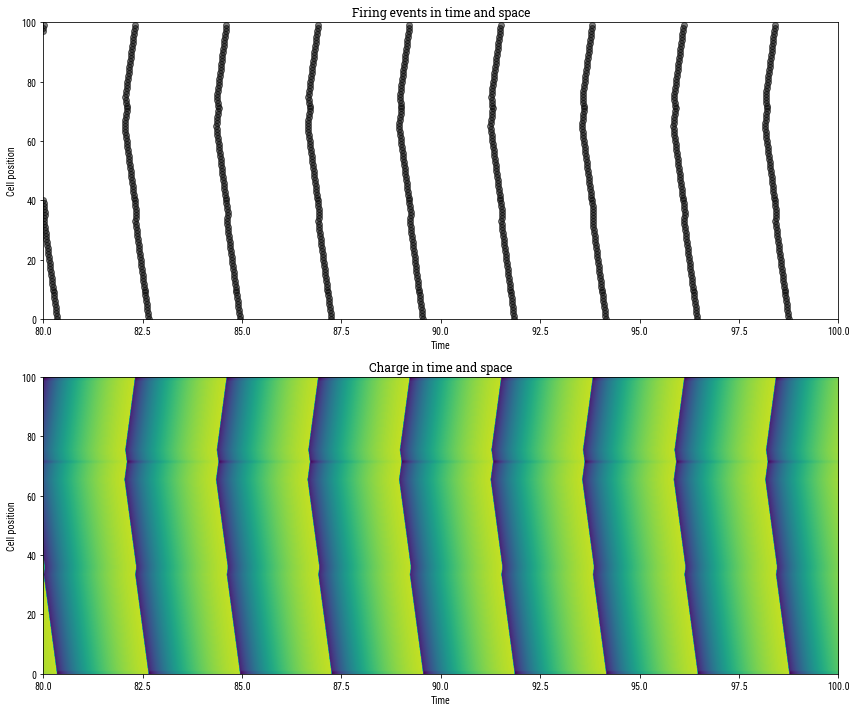

In [8]:
# Show
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True, sharey=True)

ax = axes[0]
ax.set_title('Firing events in time and space', fontname='Roboto Slab')
ax.tick_params(labelbottom=True)
ax.set_xlabel('Time')
ax.set_ylabel('Cell position')
ax.plot(firing_times, firing_idx, 'o', color='k', alpha=0.5)

ax = axes[1]
ax.set_title('Charge in time and space', fontname='Roboto Slab')
ax.set_xlabel('Time')
ax.set_ylabel('Cell position')
im = ax.imshow(y.T, aspect='auto', extent=[0, T, 0, Nx], cmap='viridis', origin='lower')

# plt.colorbar(im, ax=ax, label='Charge')

ax.set_xlim(80, 100)

plt.tight_layout()
plt.show()